# Logistic Regression

### 1. Data Preparation and Preprocessing for Rural Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt

#load and prepare rural data
rural_data = pd.read_csv('rural.csv')
rural_data['Number of Children'].fillna(rural_data['Number of Children'].median(), inplace=True)
rural_data['Salary'] = np.clip(rural_data['Salary'], a_min=0, a_max=300000)

# define features and target for rural party affiliation and voter turnout
X_rural_party = rural_data.drop(columns=['Party Membership', 'Rate of Voter Turnout'])
y_rural_party = rural_data['Party Membership'].apply(lambda x: 1 if x == 'Democrat' else 0)
y_rural_turnout = rural_data['Rate of Voter Turnout'].apply(lambda x: 1 if x == 'High' else 0)

#preprocessing pipeline for rural data
categorical_features = ['Gender', 'Marital Status', 'Occupation', 'Standard of Living', 
                        'Most Important Issue', 'Engagement with Campaign']
numeric_features = ['Age', 'Salary', 'Number of Children']

preprocessor_rural = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

### 2. Model Training for Rural Data (Party Affiliation and Voter Turnout)

In [4]:
#build and train logistic regression models for rural data
model_rural_party = Pipeline(steps=[
    ('preprocessor', preprocessor_rural),
    ('classifier', SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3))
])
model_rural_turnout = Pipeline(steps=[
    ('preprocessor', preprocessor_rural),
    ('classifier', SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3))
])

#split and train for rural party affiliation
X_train_rural_party, X_test_rural_party, y_train_rural_party, y_test_rural_party = train_test_split(X_rural_party, y_rural_party, test_size=0.2, random_state=42)
model_rural_party.fit(X_train_rural_party, y_train_rural_party)
y_pred_rural_party = model_rural_party.predict(X_test_rural_party)

#split and train for rural voter turnout
X_train_rural_turnout, X_test_rural_turnout, y_train_rural_turnout, y_test_rural_turnout = train_test_split(X_rural_party, y_rural_turnout, test_size=0.2, random_state=42)
model_rural_turnout.fit(X_train_rural_turnout, y_train_rural_turnout)
y_pred_rural_turnout = model_rural_turnout.predict(X_test_rural_turnout)

### 3. Evaluation of Rural Models

In [5]:
#evaluate rural models
print("Rural Party Affiliation Classification Report:")
print(classification_report(y_test_rural_party, y_pred_rural_party))
print("Rural Voter Turnout Classification Report:")
print(classification_report(y_test_rural_turnout, y_pred_rural_turnout))

Rural Party Affiliation Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.90      0.72     14014
           1       0.55      0.16      0.25     10153

    accuracy                           0.59     24167
   macro avg       0.57      0.53      0.49     24167
weighted avg       0.58      0.59      0.52     24167

Rural Voter Turnout Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.66      0.68      9004
           1       0.80      0.83      0.81     15163

    accuracy                           0.76     24167
   macro avg       0.75      0.74      0.74     24167
weighted avg       0.76      0.76      0.76     24167



### 4. Feature Importance and Coefficient Interpretation for Rural Data

Feature Coefficients for Rural Party Affiliation:
Gender_Male: -0.0471
Gender_Other: -0.0939
Marital Status_Married: 0.0179
Marital Status_Single: 0.0485
Marital Status_Widowed: -0.0611
Occupation_Electrician: 0.0324
Occupation_Farmer: -0.0177
Occupation_Healthcare Worker: -0.0618
Occupation_Mechanic: 0.0416
Occupation_Police Officer: -0.1628
Occupation_Retail Worker: 0.6246
Occupation_Teacher: 0.0243
Occupation_Technician: -0.2468
Occupation_Unemployed: -0.0155
Standard of Living_Low: 0.4435
Standard of Living_Medium: -0.0356
Most Important Issue_Education: 0.1682
Most Important Issue_Environment: -0.0372
Most Important Issue_Healthcare: -0.0610
Most Important Issue_National Security: -0.0498
Engagement with Campaign_Low: -0.0145
Engagement with Campaign_Medium: -0.1648
Age: -0.0748
Salary: -0.2359
Number of Children: -0.5244


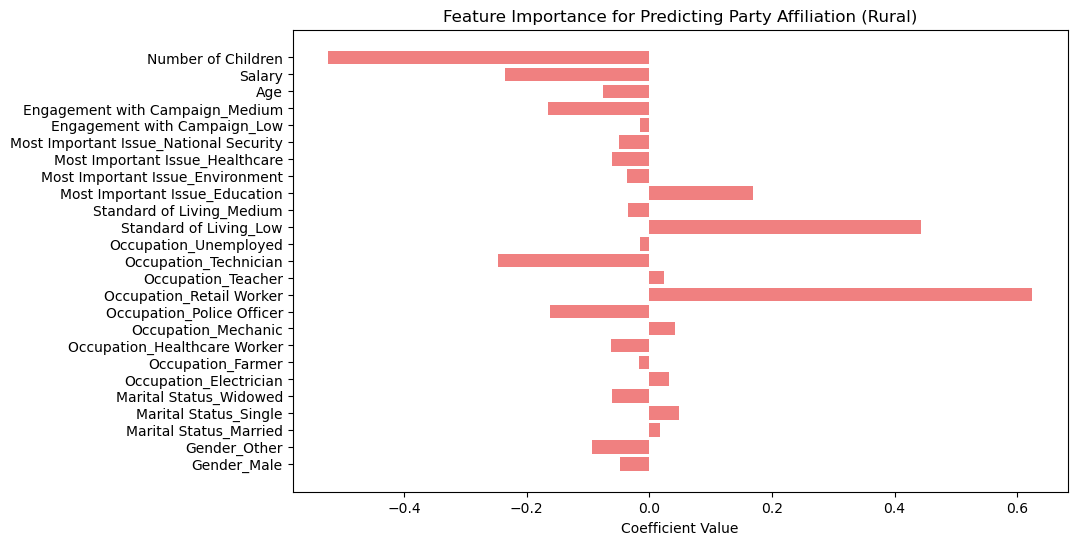

Feature Coefficients for Rural Voter Turnout:
Gender_Male: 0.1049
Gender_Other: 0.0339
Marital Status_Married: -0.0929
Marital Status_Single: 0.0101
Marital Status_Widowed: -0.0009
Occupation_Electrician: -0.0514
Occupation_Farmer: 0.0556
Occupation_Healthcare Worker: 0.0150
Occupation_Mechanic: -0.1416
Occupation_Police Officer: -0.0119
Occupation_Retail Worker: -0.0007
Occupation_Teacher: -0.1031
Occupation_Technician: -0.0379
Occupation_Unemployed: 0.0011
Standard of Living_Low: -0.0657
Standard of Living_Medium: -0.1172
Most Important Issue_Education: -0.0216
Most Important Issue_Environment: -0.0534
Most Important Issue_Healthcare: 0.0535
Most Important Issue_National Security: -0.0510
Engagement with Campaign_Low: -0.0960
Engagement with Campaign_Medium: 0.1561
Age: -0.1057
Salary: -3.5047
Number of Children: -1.8750


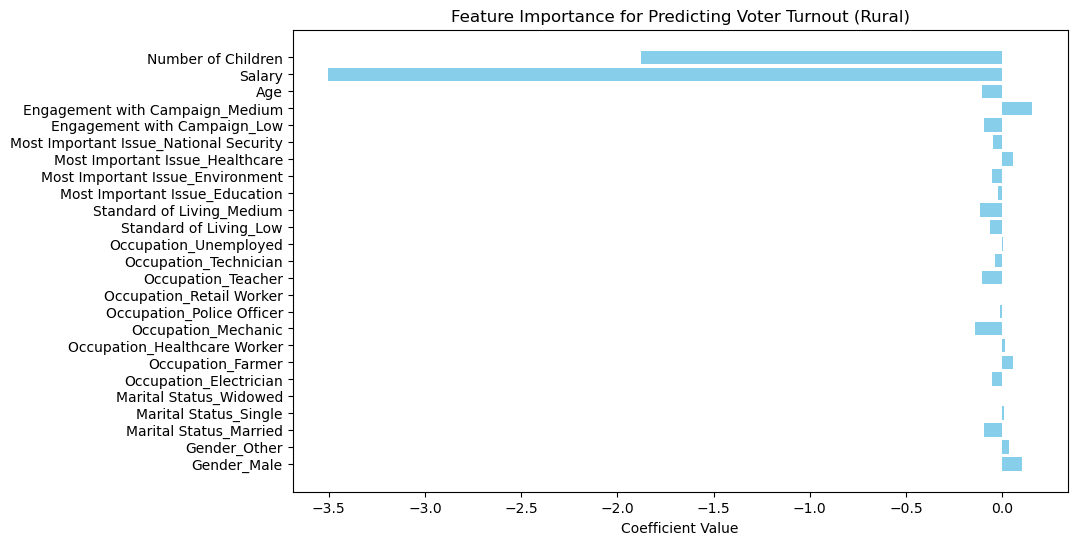

In [6]:
#extract and interpret the coefficients for rural party affiliation
coefficients_rural_party = model_rural_party.named_steps['classifier'].coef_[0]
feature_names_rural = list(preprocessor_rural.transformers_[1][1].get_feature_names_out(categorical_features)) + numeric_features

print("Feature Coefficients for Rural Party Affiliation:")
for feature, coef in zip(feature_names_rural, coefficients_rural_party):
    print(f"{feature}: {coef:.4f}")

#plot the feature importance for rural party affiliation
plt.figure(figsize=(10, 6))
plt.barh(feature_names_rural, coefficients_rural_party, color='lightcoral')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance for Predicting Party Affiliation (Rural)')
plt.show()

# extract and interpret the coefficients for rural voter turnout
coefficients_rural_turnout = model_rural_turnout.named_steps['classifier'].coef_[0]

print("Feature Coefficients for Rural Voter Turnout:")
for feature, coef in zip(feature_names_rural, coefficients_rural_turnout):
    print(f"{feature}: {coef:.4f}")

#plot the feature importance for rural voter turnout
plt.figure(figsize=(10, 6))
plt.barh(feature_names_rural, coefficients_rural_turnout, color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance for Predicting Voter Turnout (Rural)')
plt.show()


### 5. ROC Curves for Rural Models

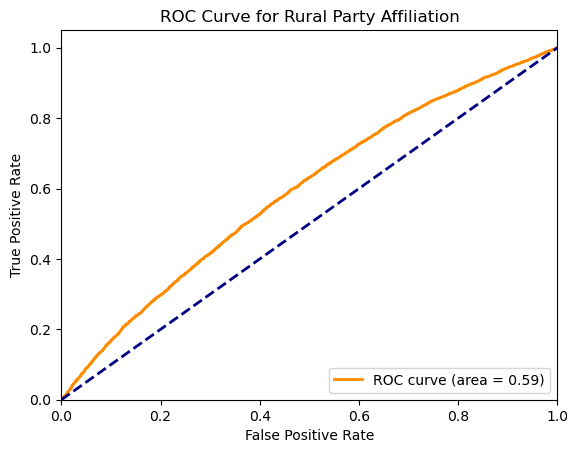

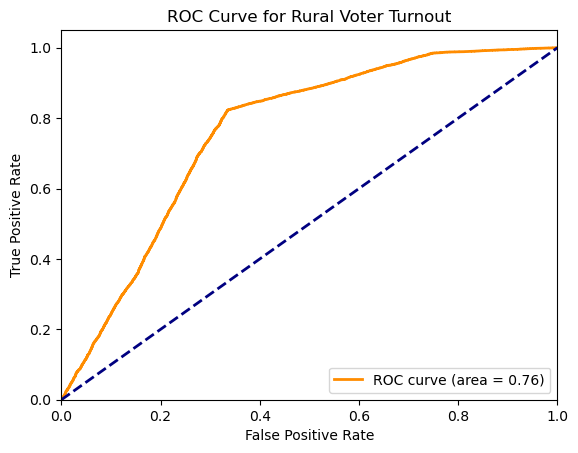

In [7]:
#ROC Curve for Rural Party Affiliation
y_prob_rural_party = model_rural_party.decision_function(X_test_rural_party)
fpr_rural_party, tpr_rural_party, _ = roc_curve(y_test_rural_party, y_prob_rural_party)
roc_auc_rural_party = auc(fpr_rural_party, tpr_rural_party)

plt.figure()
plt.plot(fpr_rural_party, tpr_rural_party, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rural_party)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Rural Party Affiliation')
plt.legend(loc="lower right")
plt.show()

#ROC Curve for Rural Voter Turnout
y_prob_rural_turnout = model_rural_turnout.decision_function(X_test_rural_turnout)
fpr_rural_turnout, tpr_rural_turnout, _ = roc_curve(y_test_rural_turnout, y_prob_rural_turnout)
roc_auc_rural_turnout = auc(fpr_rural_turnout, tpr_rural_turnout)

plt.figure()
plt.plot(fpr_rural_turnout, tpr_rural_turnout, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rural_turnout)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Rural Voter Turnout')
plt.legend(loc="lower right")
plt.show()


### 6. Predicting Probabilities and Summary Statistics for Rural Data

In [8]:
#predict probabilities for rural
y_prob_rural_turnout = model_rural_turnout.predict_proba(X_test_rural_turnout)[:, 1] * 100
y_prob_rural_party = model_rural_party.predict_proba(X_test_rural_party)[:, 1] * 100

avg_rural_turnout_percent = np.mean(y_prob_rural_turnout)
avg_rural_democrat_percent = np.mean(y_prob_rural_party)
avg_rural_republican_percent = 100 - avg_rural_democrat_percent

print(f"Average predicted likelihood of High Voter Turnout (Rural): {avg_rural_turnout_percent:.2f}%")
print(f"Average predicted likelihood of voting Democrat (Rural): {avg_rural_democrat_percent:.2f}%")
print(f"Average predicted likelihood of voting Republican (Rural): {avg_rural_republican_percent:.2f}%")


Average predicted likelihood of High Voter Turnout (Rural): 62.78%
Average predicted likelihood of voting Democrat (Rural): 39.76%
Average predicted likelihood of voting Republican (Rural): 60.24%


### 7. Repeat Analysis for Urban Data

In [10]:
#repeat the same process for urban data
urban_data = pd.read_csv('urban.csv')
urban_data['Number of Children'].fillna(urban_data['Number of Children'].median(), inplace=True)
urban_data['Salary'] = np.clip(urban_data['Salary'], a_min=0, a_max=300000)

X_urban_party = urban_data.drop(columns=['Party Membership', 'Rate of Voter Turnout'])
y_urban_party = urban_data['Party Membership'].apply(lambda x: 1 if x == 'Democrat' else 0)
y_urban_turnout = urban_data['Rate of Voter Turnout'].apply(lambda x: 1 if x == 'High' else 0)

preprocessor_urban = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

model_urban_party = Pipeline(steps=[
    ('preprocessor', preprocessor_urban),
    ('classifier', SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3))
])
model_urban_turnout = Pipeline(steps=[
    ('preprocessor', preprocessor_urban),
    ('classifier', SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3))
])

X_train_urban_party, X_test_urban_party, y_train_urban_party, y_test_urban_party = train_test_split(X_urban_party, y_urban_party, test_size=0.2, random_state=42)
model_urban_party.fit(X_train_urban_party, y_train_urban_party)
y_pred_urban_party = model_urban_party.predict(X_test_urban_party)

X_train_urban_turnout, X_test_urban_turnout, y_train_urban_turnout, y_test_urban_turnout = train_test_split(X_urban_party, y_urban_turnout, test_size=0.2, random_state=42)
model_urban_turnout.fit(X_train_urban_turnout, y_train_urban_turnout)
y_pred_urban_turnout = model_urban_turnout.predict(X_test_urban_turnout)

print("Urban Party Affiliation Classification Report:")
print(classification_report(y_test_urban_party, y_pred_urban_party))
print("Urban Voter Turnout Classification Report:")
print(classification_report(y_test_urban_turnout, y_pred_urban_turnout))


Urban Party Affiliation Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.07      0.13     48466
           1       0.70      0.97      0.81    109507

    accuracy                           0.69    157973
   macro avg       0.61      0.52      0.47    157973
weighted avg       0.64      0.69      0.60    157973

Urban Voter Turnout Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.63      0.66     57125
           1       0.80      0.84      0.82    100848

    accuracy                           0.77    157973
   macro avg       0.75      0.74      0.74    157973
weighted avg       0.76      0.77      0.76    157973



### 8. Feature Importance and Coefficient Interpretation for Urban Data

Feature Coefficients for Urban Party Affiliation:
Gender_Male: 0.0009
Gender_Other: 0.0660
Marital Status_Married: -0.0104
Marital Status_Single: -0.0013
Marital Status_Widowed: -0.0084
Occupation_Artist: -0.0093
Occupation_Banker: -0.0270
Occupation_Chef: -0.0318
Occupation_Data Scientist: 0.0364
Occupation_Doctor: -0.4058
Occupation_Engineer: 0.2145
Occupation_Finance Advisor: 0.3808
Occupation_Healthcare Worker: 0.5698
Occupation_Human Resources: 0.0810
Occupation_IT Specialist: -0.6154
Occupation_Journalist: 0.4341
Occupation_Lawyer: 0.2863
Occupation_Marketing Manager: 0.0338
Occupation_Real Estate Agent: 0.3587
Occupation_Retail Worker: 0.2691
Occupation_Scientist: 0.1066
Occupation_Software Developer: -0.4126
Occupation_Teacher: -0.1983
Occupation_Technician: 0.2066
Standard of Living_Low: 0.3409
Standard of Living_Medium: 0.2522
Most Important Issue_Education: -0.3612
Most Important Issue_Environment: -0.0150
Most Important Issue_Healthcare: -0.0541
Most Important Issue_Nationa

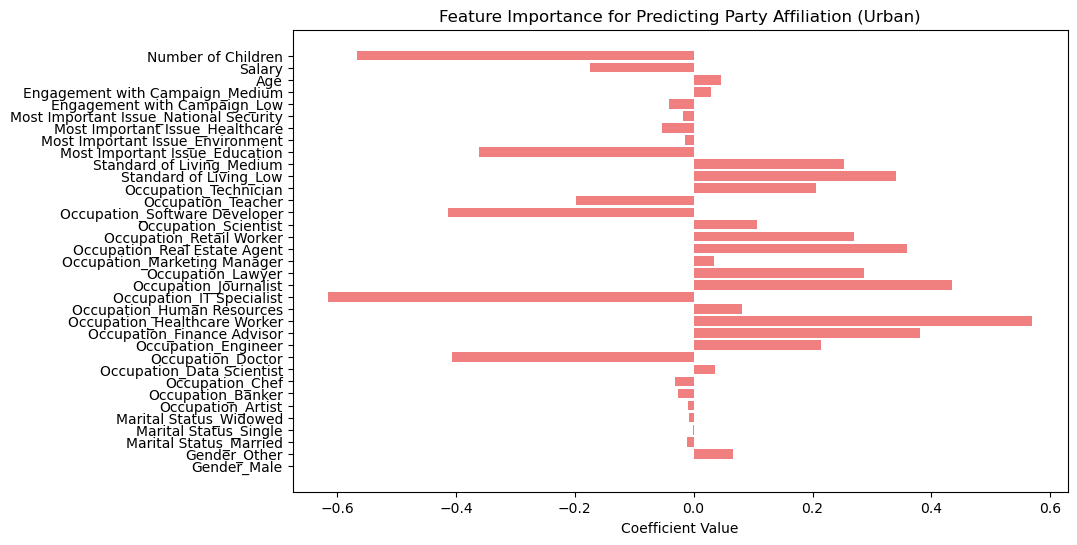

Feature Coefficients for Urban Voter Turnout:
Gender_Male: 0.0299
Gender_Other: 0.0693
Marital Status_Married: -0.0495
Marital Status_Single: -0.0402
Marital Status_Widowed: -0.0610
Occupation_Artist: 0.0126
Occupation_Banker: -0.0448
Occupation_Chef: 0.0130
Occupation_Data Scientist: -0.0744
Occupation_Doctor: -0.0484
Occupation_Engineer: -0.0217
Occupation_Finance Advisor: -0.0681
Occupation_Healthcare Worker: -0.0411
Occupation_Human Resources: -0.0205
Occupation_IT Specialist: 0.0031
Occupation_Journalist: -0.0751
Occupation_Lawyer: -0.0494
Occupation_Marketing Manager: -0.0146
Occupation_Real Estate Agent: -0.0250
Occupation_Retail Worker: -0.0547
Occupation_Scientist: -0.0270
Occupation_Software Developer: -0.0388
Occupation_Teacher: -0.0217
Occupation_Technician: -0.0674
Standard of Living_Low: -0.0437
Standard of Living_Medium: -0.0938
Most Important Issue_Education: -0.0531
Most Important Issue_Environment: 0.0345
Most Important Issue_Healthcare: 0.0105
Most Important Issue_Na

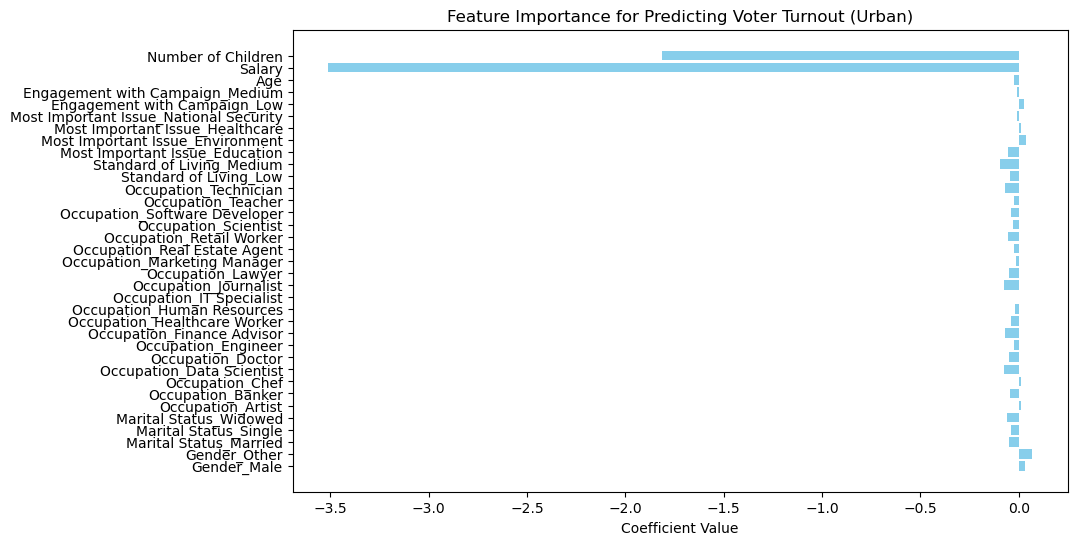

In [11]:
#Extract and interpret the coefficients for urban party affiliation
coefficients_urban_party = model_urban_party.named_steps['classifier'].coef_[0]
feature_names_urban = list(preprocessor_urban.transformers_[1][1].get_feature_names_out(categorical_features)) + numeric_features

print("Feature Coefficients for Urban Party Affiliation:")
for feature, coef in zip(feature_names_urban, coefficients_urban_party):
    print(f"{feature}: {coef:.4f}")

#plot the feature importance for urban party affiliation
plt.figure(figsize=(10, 6))
plt.barh(feature_names_urban, coefficients_urban_party, color='lightcoral')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance for Predicting Party Affiliation (Urban)')
plt.show()

#extract and interpret the coefficients for urban voter turnout
coefficients_urban_turnout = model_urban_turnout.named_steps['classifier'].coef_[0]

print("Feature Coefficients for Urban Voter Turnout:")
for feature, coef in zip(feature_names_urban, coefficients_urban_turnout):
    print(f"{feature}: {coef:.4f}")

#plot the feature importance for urban voter turnout
plt.figure(figsize=(10, 6))
plt.barh(feature_names_urban, coefficients_urban_turnout, color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance for Predicting Voter Turnout (Urban)')
plt.show()


### 9. ROC Curves for Urban Models

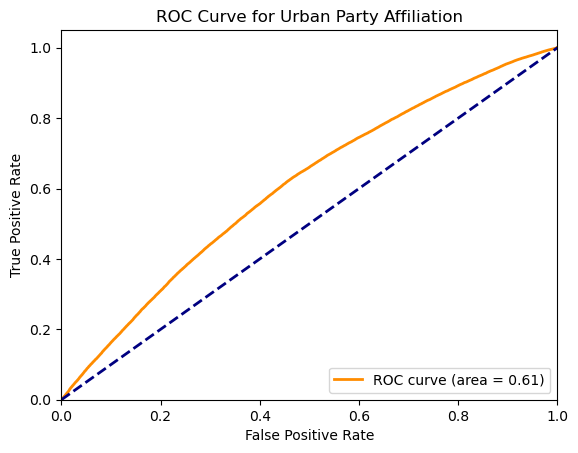

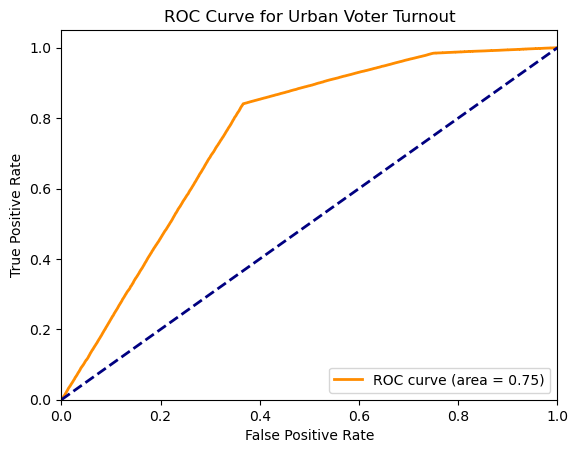

In [12]:
#ROC Curve for Urban Party Affiliation
y_prob_urban_party = model_urban_party.decision_function(X_test_urban_party)
fpr_urban_party, tpr_urban_party, _ = roc_curve(y_test_urban_party, y_prob_urban_party)
roc_auc_urban_party = auc(fpr_urban_party, tpr_urban_party)

plt.figure()
plt.plot(fpr_urban_party, tpr_urban_party, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_urban_party)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Urban Party Affiliation')
plt.legend(loc="lower right")
plt.show()

#ROC Curve for Urban Voter Turnout
y_prob_urban_turnout = model_urban_turnout.decision_function(X_test_urban_turnout)
fpr_urban_turnout, tpr_urban_turnout, _ = roc_curve(y_test_urban_turnout, y_prob_urban_turnout)
roc_auc_urban_turnout = auc(fpr_urban_turnout, tpr_urban_turnout)

plt.figure()
plt.plot(fpr_urban_turnout, tpr_urban_turnout, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_urban_turnout)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Urban Voter Turnout')
plt.legend(loc="lower right")
plt.show()


### 10. Predicting Probabilities and Summary Statistics for Urban Data

In [14]:
#predict probabilities for urban data
y_prob_urban_turnout = model_urban_turnout.predict_proba(X_test_urban_turnout)[:, 1] * 100
y_prob_urban_party = model_urban_party.predict_proba(X_test_urban_party)[:, 1] * 100

#calculate the average likelihood of high voter turnout and voting Democrat for the entire urban dataset
avg_urban_turnout_percent = np.mean(y_prob_urban_turnout)
avg_urban_democrat_percent = np.mean(y_prob_urban_party)
avg_urban_republican_percent = 100 - avg_urban_democrat_percent

print(f"Average predicted likelihood of High Voter Turnout (Urban): {avg_urban_turnout_percent:.2f}%")
print(f"Average predicted likelihood of voting Democrat (Urban): {avg_urban_democrat_percent:.2f}%")
print(f"Average predicted likelihood of voting Republican (Urban): {avg_urban_republican_percent:.2f}%")

# Final comparison output for rural data
avg_rural_turnout_percent = np.mean(y_prob_rural_turnout)
avg_rural_democrat_percent = np.mean(y_prob_rural_party)
avg_rural_republican_percent = 100 - avg_rural_democrat_percent

print(f"\nAverage predicted likelihood of High Voter Turnout (Rural): {avg_rural_turnout_percent:.2f}%")
print(f"Average predicted likelihood of voting Democrat (Rural): {avg_rural_democrat_percent:.2f}%")
print(f"Average predicted likelihood of voting Republican (Rural): {avg_rural_republican_percent:.2f}%")


Average predicted likelihood of High Voter Turnout (Urban): 63.76%
Average predicted likelihood of voting Democrat (Urban): 68.63%
Average predicted likelihood of voting Republican (Urban): 31.37%

Average predicted likelihood of High Voter Turnout (Rural): 62.78%
Average predicted likelihood of voting Democrat (Rural): 39.76%
Average predicted likelihood of voting Republican (Rural): 60.24%
